# Build a model to predict the TATA motors stock price

# Objective: -

Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another. Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence.

A stock market is a public market where you can buy and sell shares for publicly listed companies. The stocks, also known as equities, represent ownership in the company. The stock exchange is the mediator that allows the buying and selling of shares. 


Recently, we have seen an increase of more than 10 per cent in the stock price of Tata Motors. This has resulted in more attention to Tata Group stocks from all over India. But again today, we are witnessing a fall in the prices of Tata Motors‚Äô shares, which can be a negative signal for investors. So, if you want to learn how to analyze and predict the Tata Motors stock price. Predicting the stock market is one of the most important applications of Machine Learning in finance.

The ultimate goal is to predict the TATA motor stock prices using Machine Learning and the python programming language.

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('F:\ML models\TATA Motors stock prediction\Data\TATAMOTORS.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2022-02-17  505.899994  511.500000  498.299988  499.950012  499.950012   
1  2022-02-18  498.000000  502.649994  491.500000  493.149994  493.149994   
2  2022-02-21  490.149994  500.399994  486.100006  494.450012  494.450012   
3  2022-02-22  480.549988  486.299988  471.450012  478.250000  478.250000   
4  2022-02-23  481.750000  485.399994  475.299988  477.000000  477.000000   

     Volume  
0  27943077  
1  15476803  
2  22592161  
3  27957544  
4  17703998

# Dataset: -

**Attribute Information:**
1. Close (closeing price of stock)

**Five real-valued features are computed:**

1. Date
2. Open (openning price of stock)
3. High (highest price of stock)
4. Low (lowest price of stock)
5. Adj Close
6. Volume

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 250 rows and 7 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "close" column which says the value of stocks at closing.

In [5]:
df['Close'].value_counts()

452.049988    2
391.750000    2
423.500000    2
441.149994    2
435.649994    2
             ..
416.350006    1
430.850006    1
441.549988    1
437.049988    1
439.899994    1
Name: Close, Length: 232, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [6]:
df.shape

(250, 7)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 250 rows and 7 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

We can identify that the close cloumn have continuous values. So, it is a regression problem.

In [8]:
df.iloc[1]

Date         2022-02-18
Open              498.0
High         502.649994
Low               491.5
Close        493.149994
Adj Close    493.149994
Volume         15476803
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [9]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [10]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  1
There names are as follows:  ['Date']


In [11]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [12]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  1
There names are as follows:  ['Volume']


In [13]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [14]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  5
There name are as follow:  ['Open', 'High', 'Low', 'Close', 'Adj Close']


## Step 2 Insights: -

1) We have total 7 features where 1 is object type, 1 is integer type while others are float type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.


##### We identify that the 4 features open, high, low and close which represent the value of stock at different scenario.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [15]:
df.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   429.470400  434.274601  423.202200  428.294599  428.294599   
std     24.324552   24.547839   24.424637   24.567394   24.567394   
min    380.250000  384.649994  366.200012  372.299988  372.299988   
25%    411.924996  417.387490  406.112503  411.725006  411.725006   
50%    429.125000  434.950012  423.574997  428.000000  428.000000   
75%    444.887497  449.237503  438.112496  443.262490  443.262490   
max    505.899994  511.500000  498.299988  499.950012  499.950012   

             Volume  
count  2.500000e+02  
mean   1.764996e+07  
std    1.062443e+07  
min    2.871205e+06  
25%    1.147789e+07  
50%    1.462807e+07  
75%    1.956505e+07  
max    7.142575e+07

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical or float data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

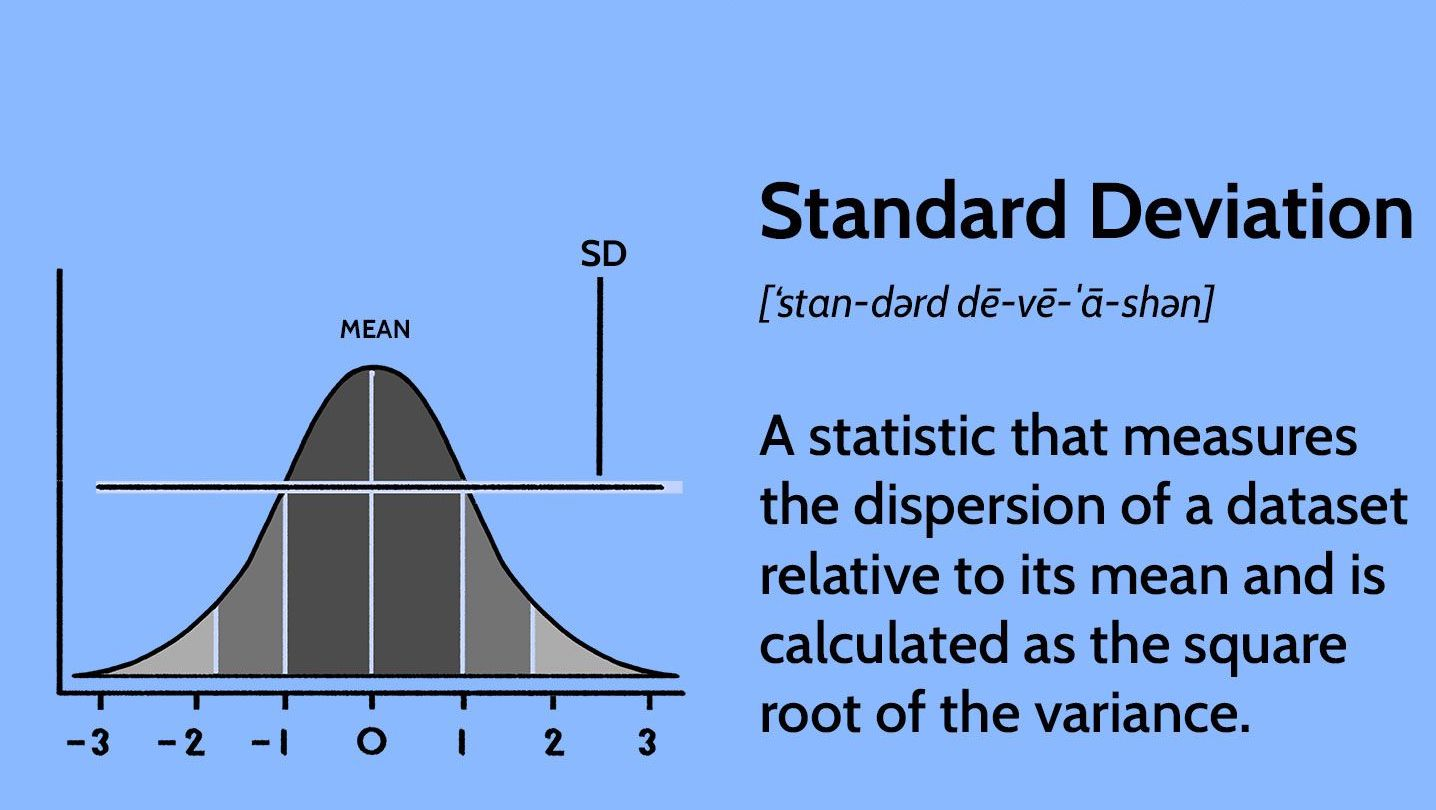

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [54]:
df.std()

Open         2.432455e+01
High         2.454784e+01
Low          2.442464e+01
Close        2.456739e+01
Adj Close    2.456739e+01
Volume       1.062443e+07
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [55]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [56]:
std_cal(df, float64_lst)

normal_value  zero_value
0             5           0

zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

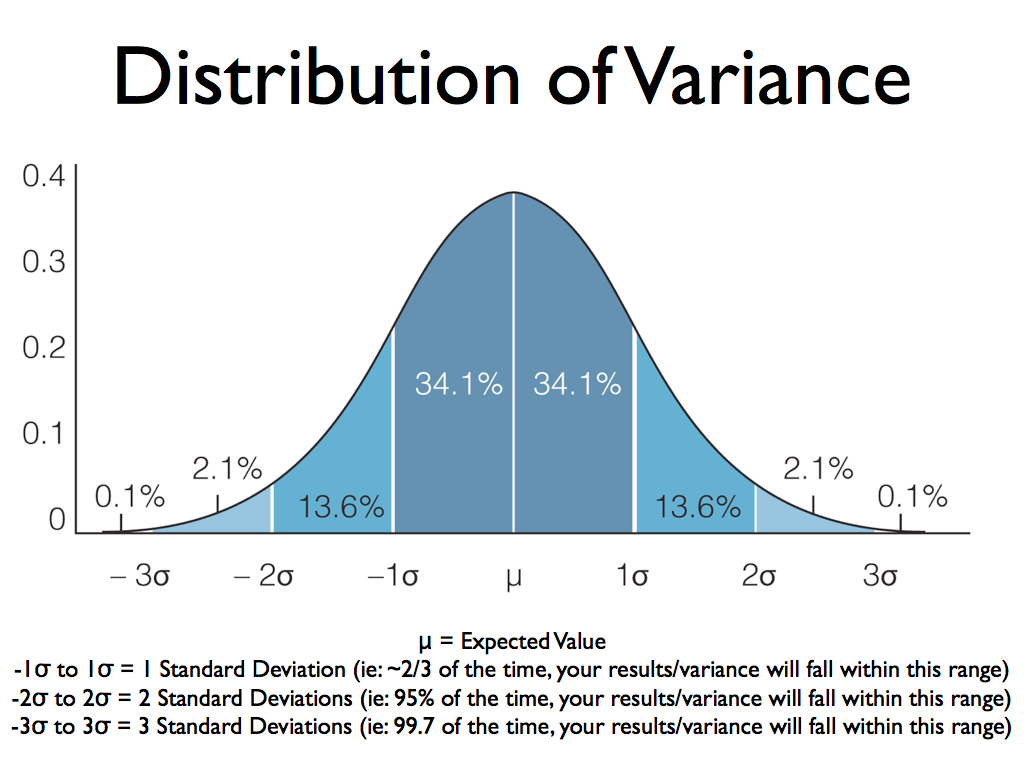

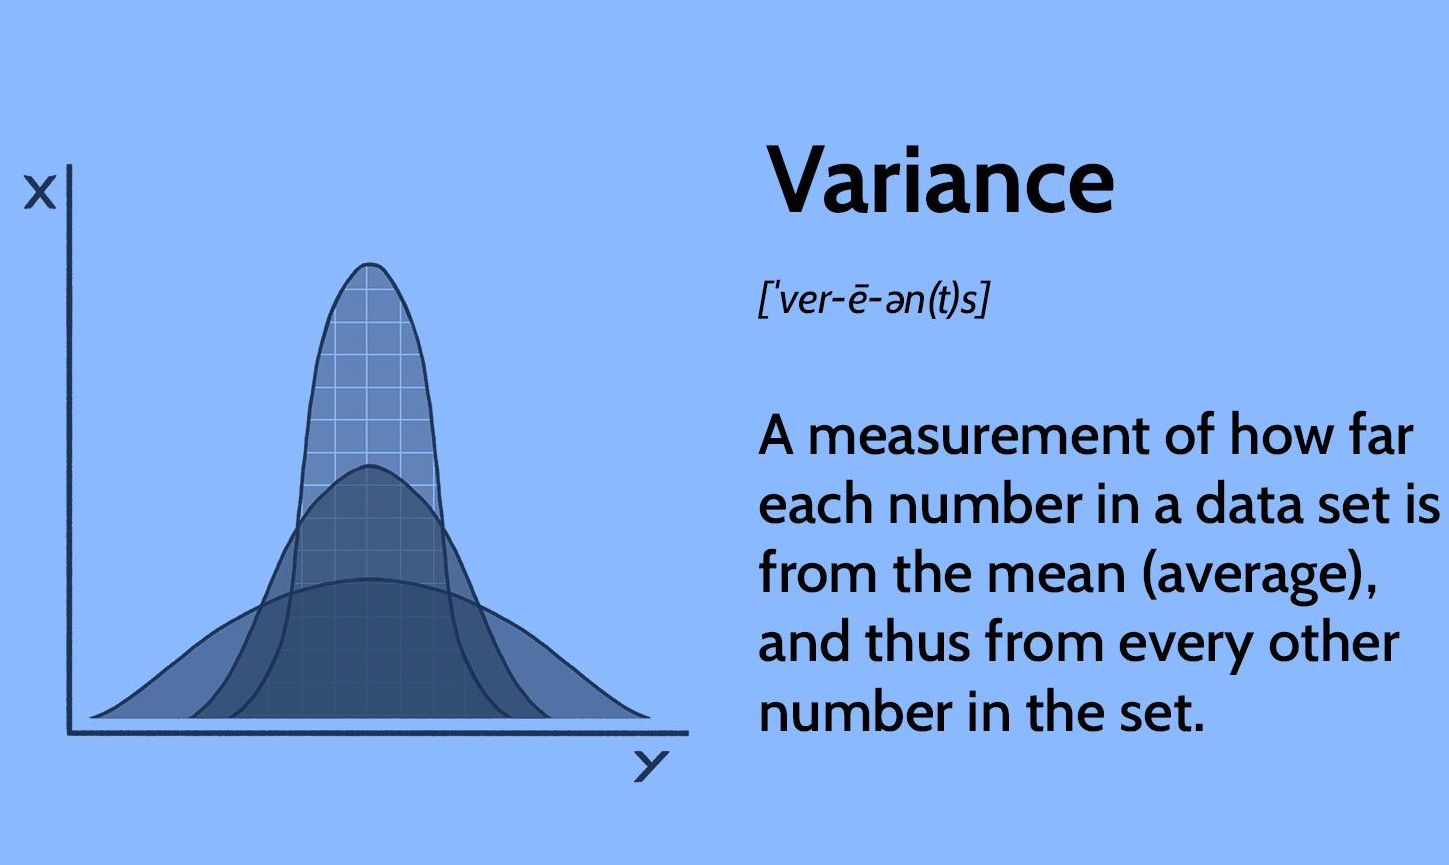

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

Type Markdown and LaTeX:  ùõº2

In [57]:
df.var()

Open         5.916838e+02
High         6.025964e+02
Low          5.965629e+02
Close        6.035568e+02
Adj Close    6.035568e+02
Volume       1.128785e+14
dtype: float64

#### We can also understand the Variance using the below function.

In [58]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [59]:
var_cal(df, float64_lst)

normal_value  zero_value
0             5           0

zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

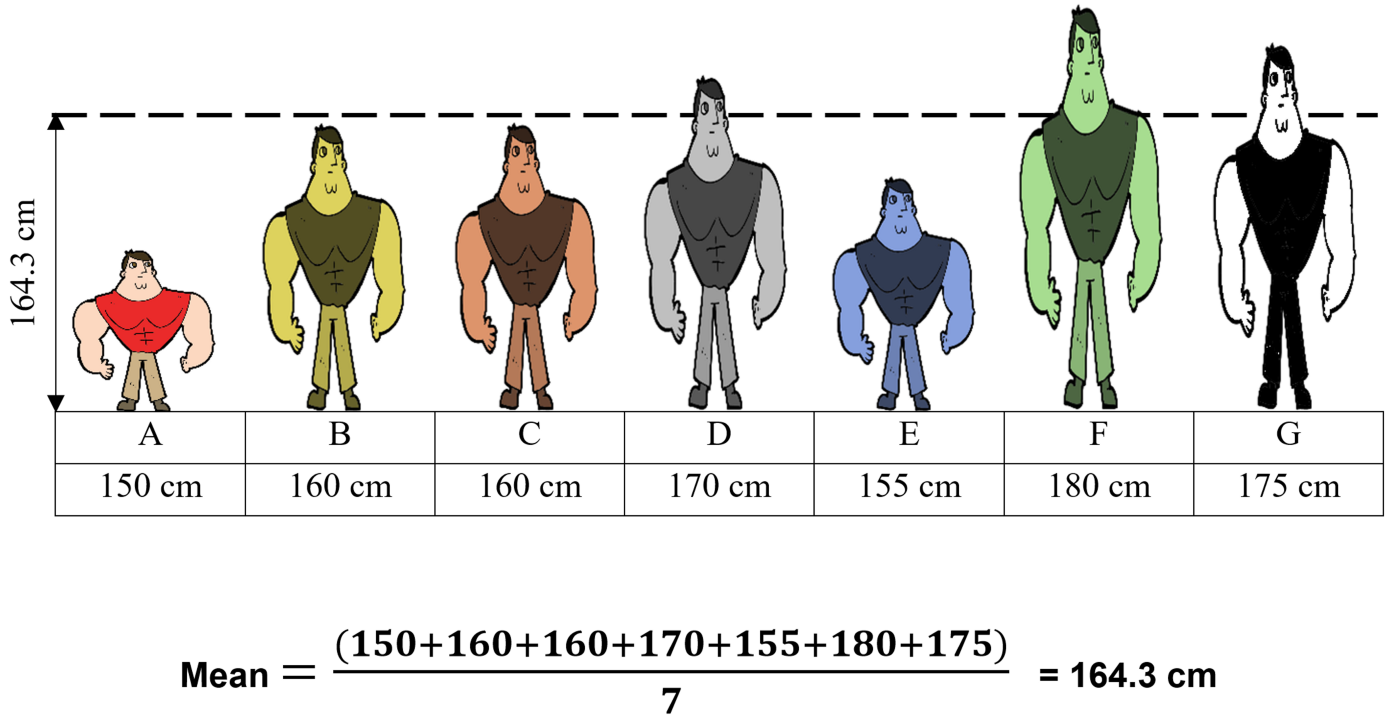

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [24]:
df.mean()

Open         4.294704e+02
High         4.342746e+02
Low          4.232022e+02
Close        4.282946e+02
Adj Close    4.282946e+02
Volume       1.764996e+07
dtype: float64

#### We can also understand the mean using the below function. 

In [25]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [26]:
mean_cal(df, int64_lst)

normal_value  zero_value
0             1           0

In [27]:
mean_cal(df,float64_lst)

normal_value  zero_value
0             5           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
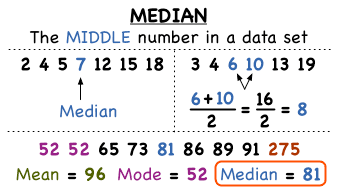

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.

In [28]:
df.median()

Open         4.291250e+02
High         4.349500e+02
Low          4.235750e+02
Close        4.280000e+02
Adj Close    4.280000e+02
Volume       1.462807e+07
dtype: float64

####  We can also understand the median using the below function. 

In [29]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [30]:
median_cal(df, int64_lst)

normal_value  zero_value
0             1           0

In [31]:
median_cal(df, float64_lst)

normal_value  zero_value
0             5           0

zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
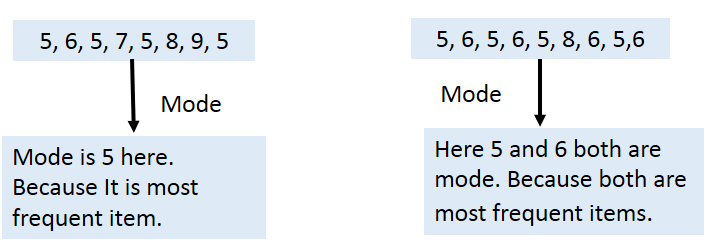
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [32]:
df.mode()

Date   Open        High    Low       Close   Adj Close    Volume
0    2022-02-17  410.0  390.000000  405.0  391.750000  391.750000   2871205
1    2022-02-18    NaN  397.000000  408.0  408.399994  408.399994   6314883
2    2022-02-21    NaN  414.899994    NaN  414.100006  414.100006   6407614
3    2022-02-22    NaN  419.450012    NaN  418.000000  418.000000   6568241
4    2022-02-23    NaN  421.399994    NaN  422.149994  422.149994   6768613
..          ...    ...         ...    ...         ...         ...       ...
245  2023-02-13    NaN         NaN    NaN         NaN         NaN  55543383
246  2023-02-14    NaN         NaN    NaN         NaN         NaN  57265685
247  2023-02-15    NaN         NaN    NaN         NaN         NaN  59776817
248  2023-02-16    NaN         NaN    NaN         NaN         NaN  63360467
249  2023-02-17    NaN         NaN    NaN         NaN         NaN  71425747

[250 rows x 7 columns]

In [33]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [34]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0             5           0             0

zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Graphical representation of statistical analysis

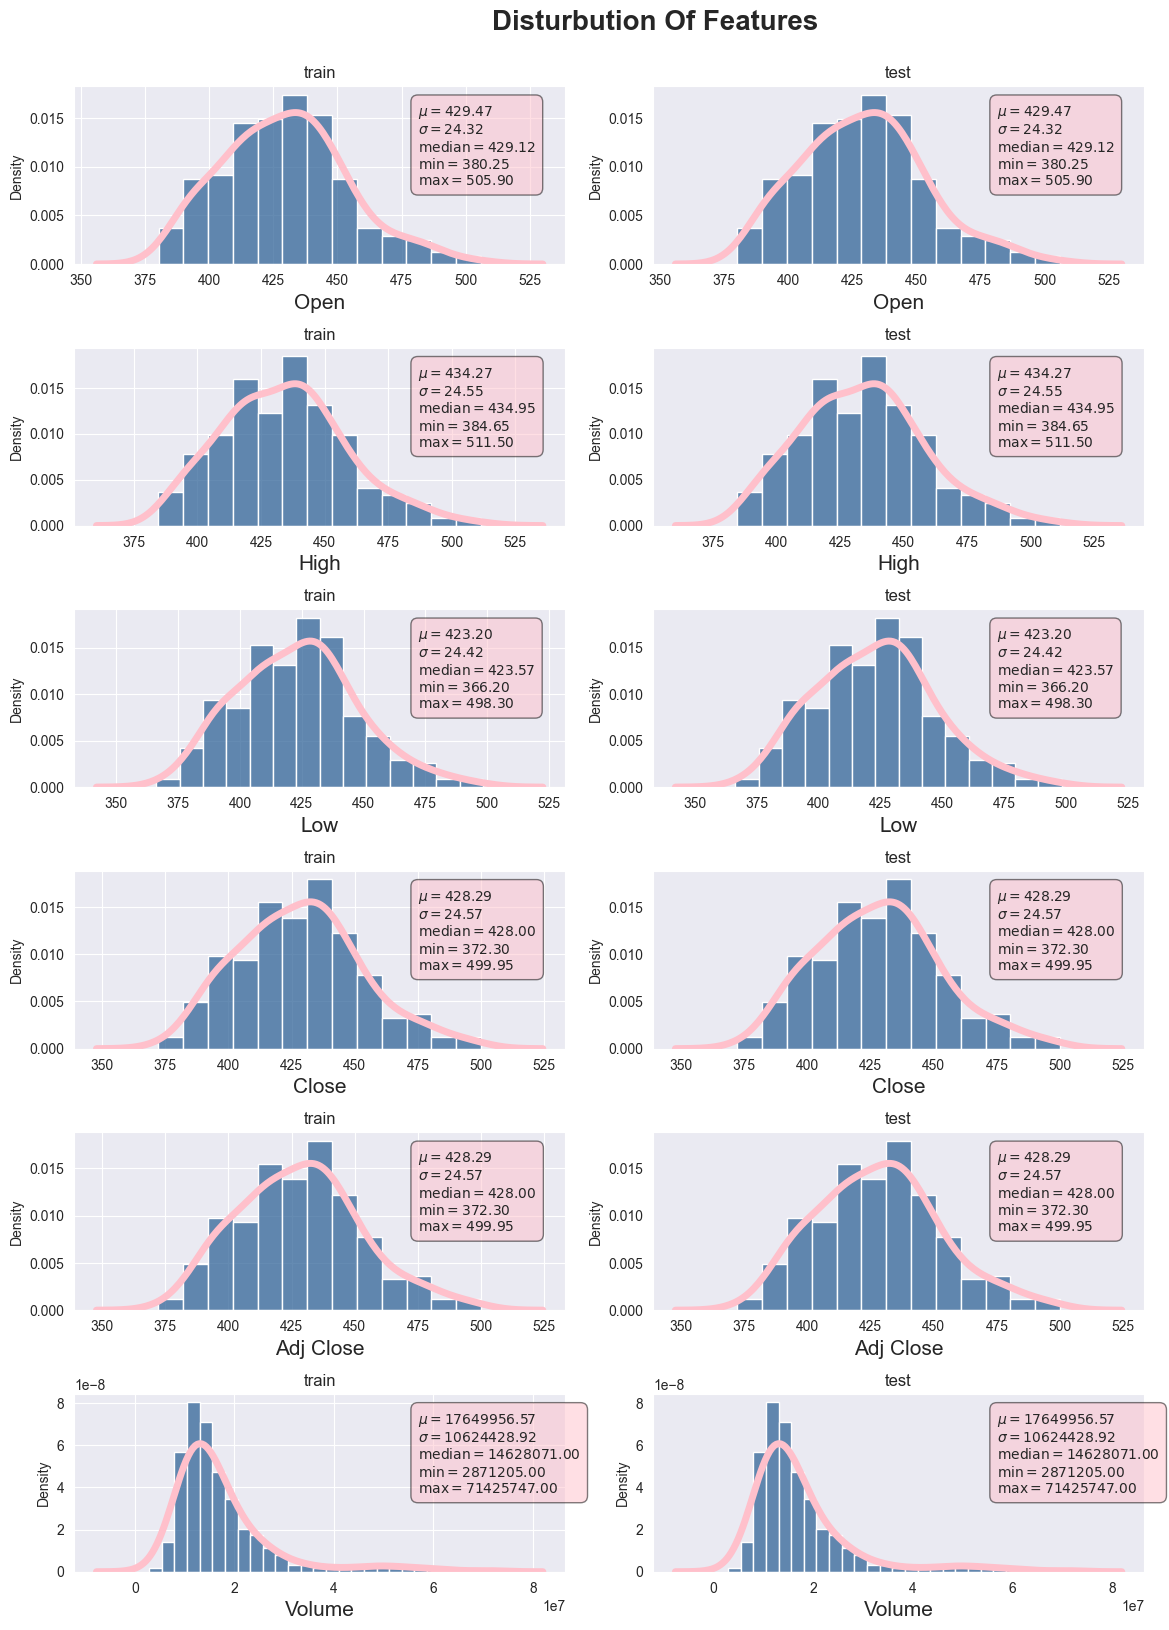

In [35]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(df.select_dtypes(include=['int64','float64']).columns)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,fontweight = "bold")
plt.tight_layout()
plt.show()

# Null and Nan values

1. **Null Values**


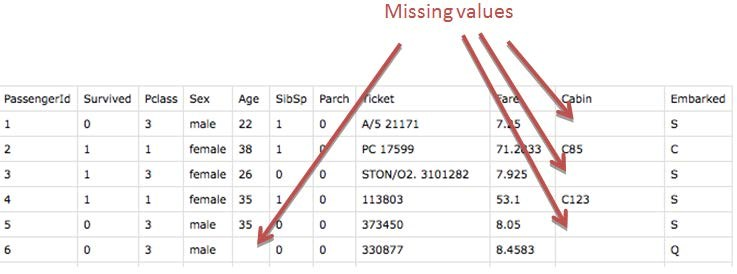

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [113]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

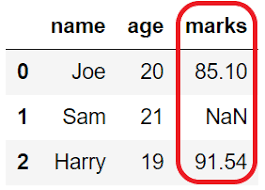

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [114]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [116]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

Date       2022-02-17    1
2022-10-28    1
2022-10-10    1
2022-10-11    1
2022-10-12    1
             ..
2022-06-28    1
2022-06-29    1
2022-06-30    1
2022-07-01    1
2023-02-17    1
Name: Date, Length: 250, dtype: int64


- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

# Skewness 

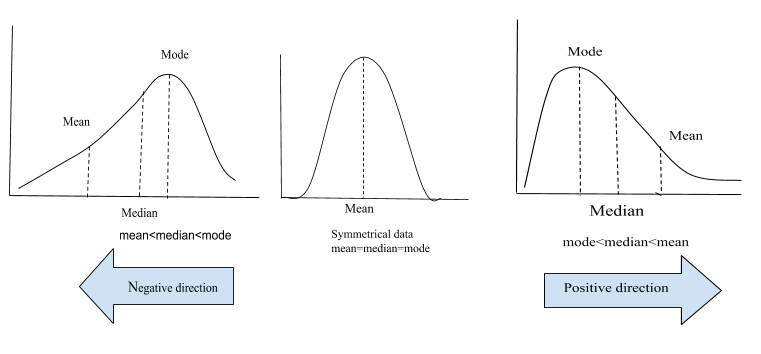

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [117]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [118]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [119]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0       Open          0.3778  positive (+ve) skewed
1       High          0.3922  positive (+ve) skewed
2        Low          0.3056  positive (+ve) skewed
3      Close          0.3286  positive (+ve) skewed
4  Adj Close          0.3286  positive (+ve) skewed

In [120]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      5                   0                      0

In [121]:
float64_cols = ['int64','int32']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [122]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0  Volume          2.3798  positive (+ve) skewed

In [123]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      1                   0                      0

We notice with the above results that we have following details:
1. 6 columns are positive skewed

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them, some of the columns are positively skewed while some are negative skewed. We have used cube root transformation to transform the skewness.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

### Why is Stock Market Prediction Important?

Some of the top advantages associated with the stock market prediction:- 

- Removes the Investment Bias.
- Develops the Habit of Complete Analysis.
- Minimizes Your Losses.
- Assures Consistency.
- Gives a Better Idea about Entry and Exit Points.
- Allows the Smart Way of Making Money.

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. Scatter Plot to show the relation between variables
6. Jointplot

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

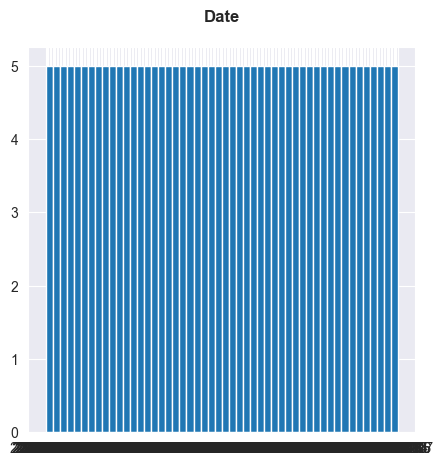

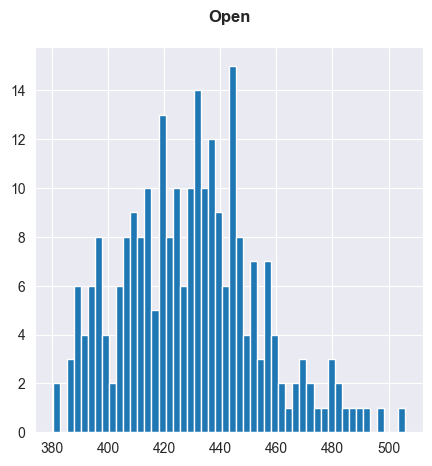

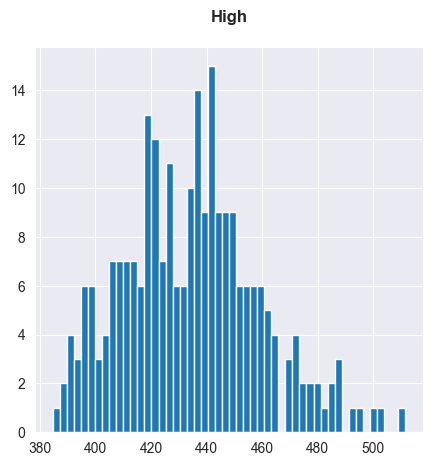

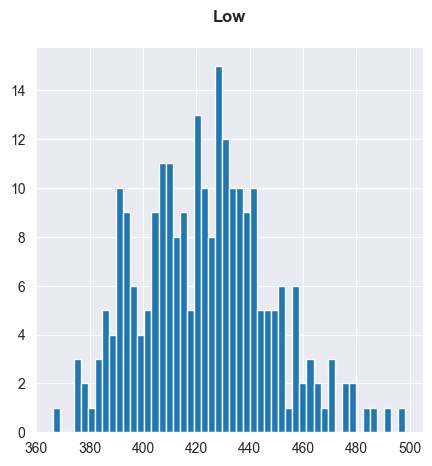

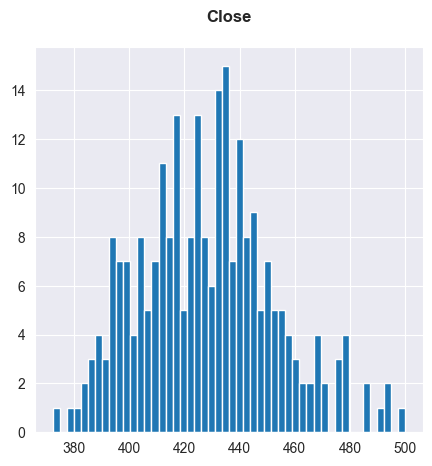

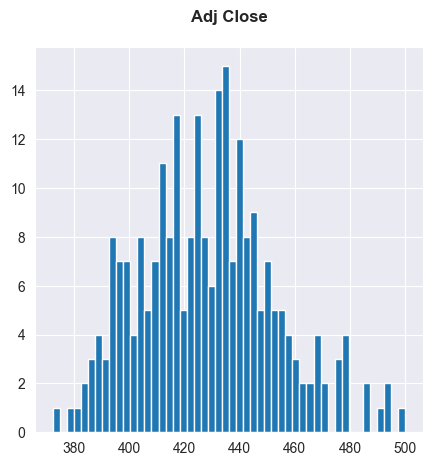

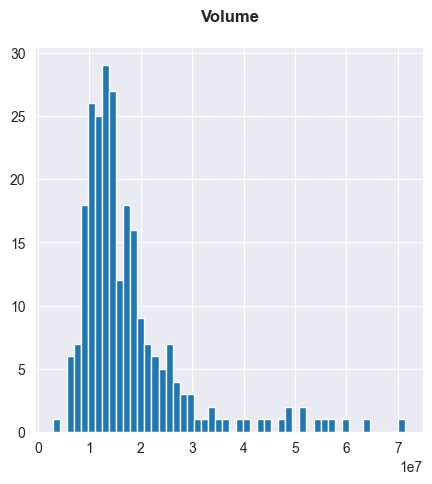

In [53]:
# Distribution in attributes
%matplotlib inline
for i in df.columns:
    df[i].hist(bins=50, figsize=(5,5))
    plt.title(i+"\n",fontweight ="bold")
    plt.show()
    print("   =======================================================================================================\n")


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set‚Äôs distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

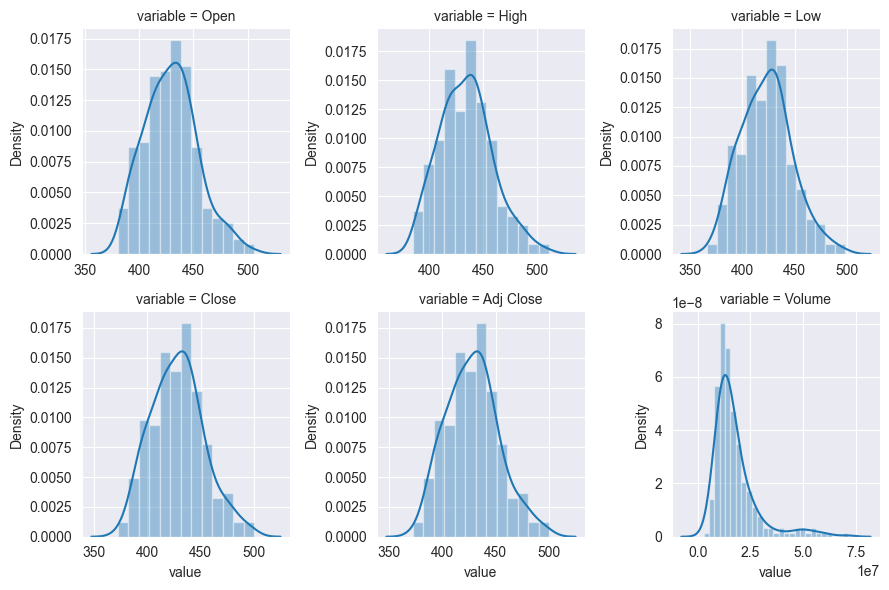

In [37]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [126]:
df.skew()

Open         0.377781
High         0.392227
Low          0.305637
Close        0.328589
Adj Close    0.328589
Volume       2.379818
dtype: float64

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 6 columns are positive skewed
2. 1 column is added here i.e Close which is our target variable which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [127]:
#+ve skewed 
df['Close'].skew()

0.3285887193112172

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



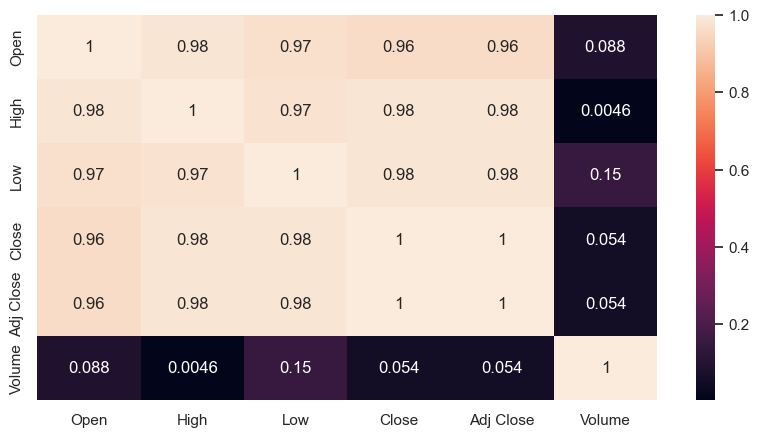

In [128]:
#correlation plot
sns.set(rc = {'figure.figsize':(10,5)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against Close. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [129]:
print (corr['Close'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Close'].sort_values(ascending=False)[-5:]) #last 5 values`

Close        1.000000
Adj Close    1.000000
Low          0.984145
High         0.983082
Open         0.958882
Volume       0.053984
Name: Close, dtype: float64 

----------------------
Adj Close    1.000000
Low          0.984145
High         0.983082
Open         0.958882
Volume       0.053984
Name: Close, dtype: float64


Here we see that the Adj Close features are 100% correlated with the target variable.

In [130]:
corr

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.982571  0.972639  0.958882   0.958882  0.087822
High       0.982571  1.000000  0.974115  0.983082   0.983082  0.004581
Low        0.972639  0.974115  1.000000  0.984145   0.984145  0.151788
Close      0.958882  0.983082  0.984145  1.000000   1.000000  0.053984
Adj Close  0.958882  0.983082  0.984145  1.000000   1.000000  0.053984
Volume     0.087822  0.004581  0.151788  0.053984   0.053984  1.000000

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

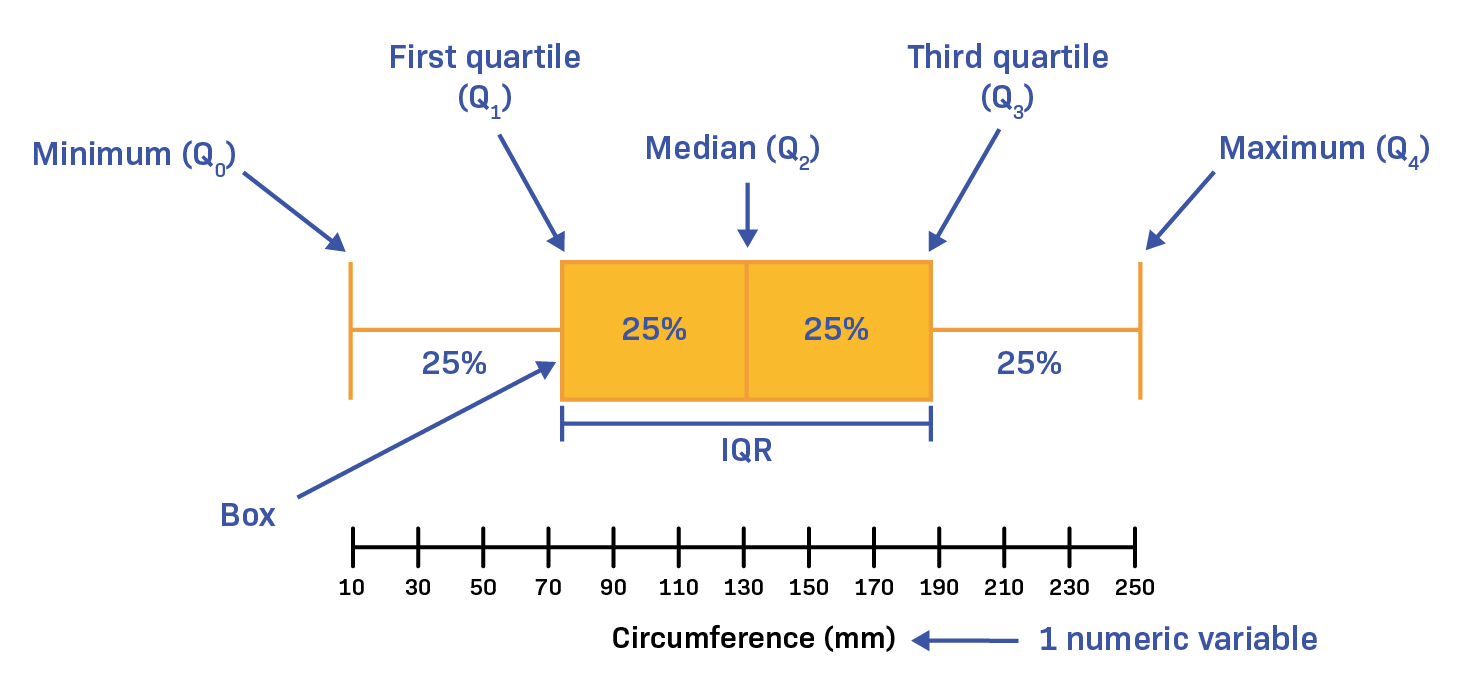

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (‚Äúminimum‚Äù, first quartile [Q1], median, third quartile [Q3] and ‚Äúmaximum‚Äù).

Basically, to find the outlier in a dataset/column.

In [39]:
features = ['Open','High','Low','Adj Close','Volume']

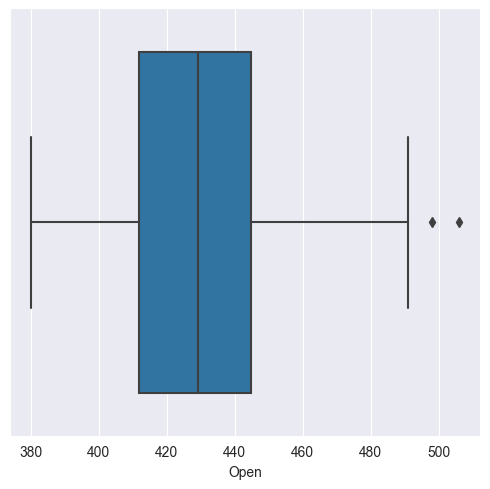

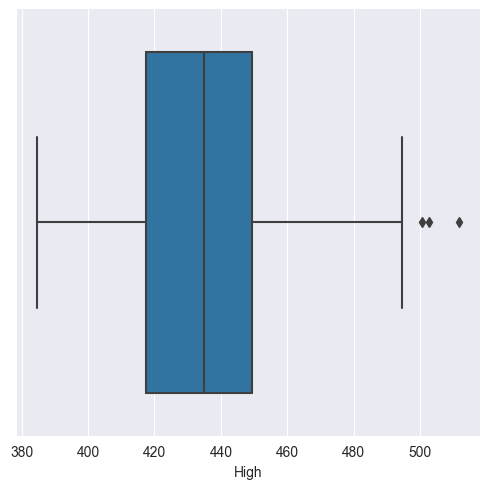

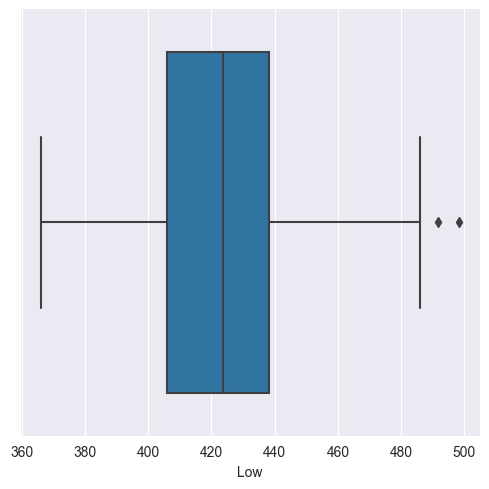

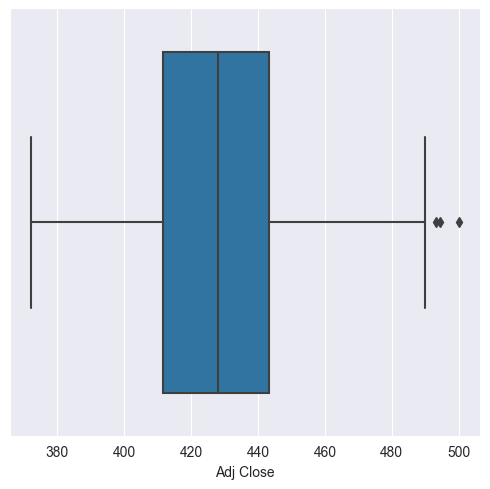

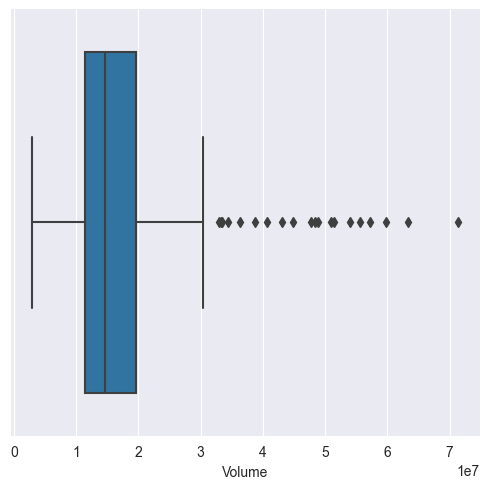

In [40]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

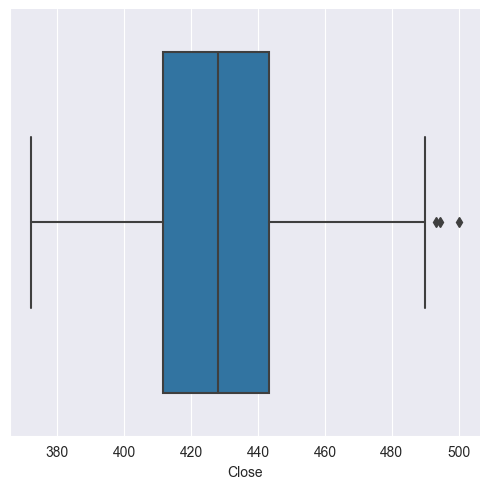

In [41]:
#for target variable
sns.catplot(data=df, x='Close', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



# 5. Scatter Plot

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs or scatter diagrams.

In [52]:
import plotly.express as px
for value in features:
    figure = px.scatter(data_frame= df,x = value,y = 'Close',trendline = 'ols')
    print("          ============================================================================================================")
    figure.show()

The line between both th variables is called Best Fir Line.The least Sum of Squares of Errors is used as the cost function for Linear Regression. For all possible lines, calculate the sum of squares of errors. The line which has the least sum of squares of errors is the best fit line.The line drawn in a scatter plot, which is near to almost all the points in the plot is known as ‚Äúline of best fit‚Äù or ‚Äútrend line‚Äú.

### Scatter Plot insight:

We can observe that various variables like carwidth,curbweight,etc shows continous increase in price. Which relates that these variables are highly correlated with the target variables.

## From above plots we can identify that open, low, high and adj close have positive relation on close.

### Why use Scatter plot?

Scatter plots are used in either of the following situations.

When we have paired numerical data
When there are multiple values of the dependent variable for a unique value of an independent variable
In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, checking whether two products that appear to be related both occur with the exact cause and so on.

# 6. Jointplot 

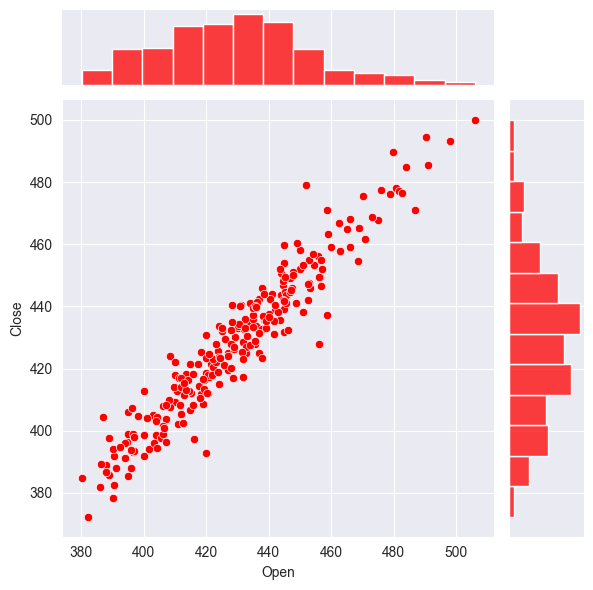

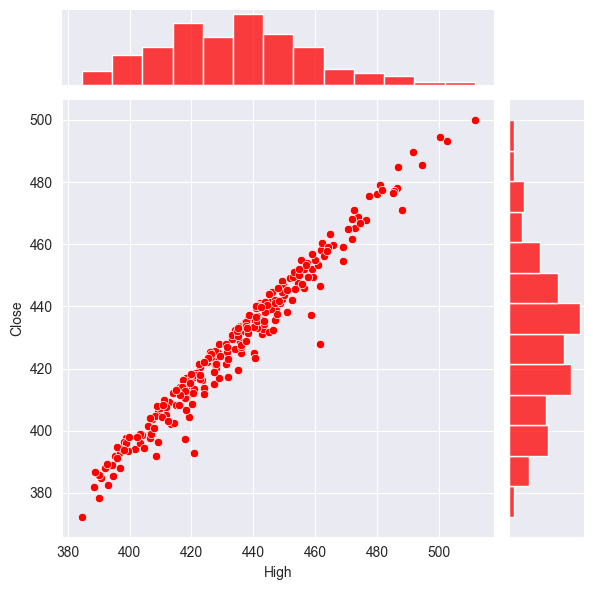

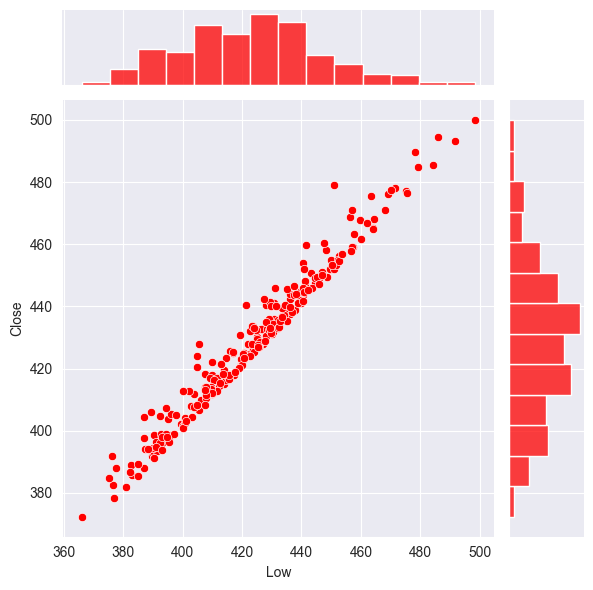

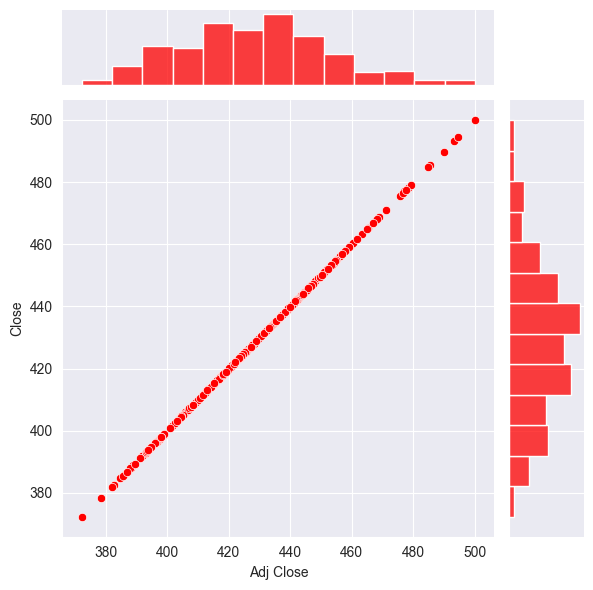

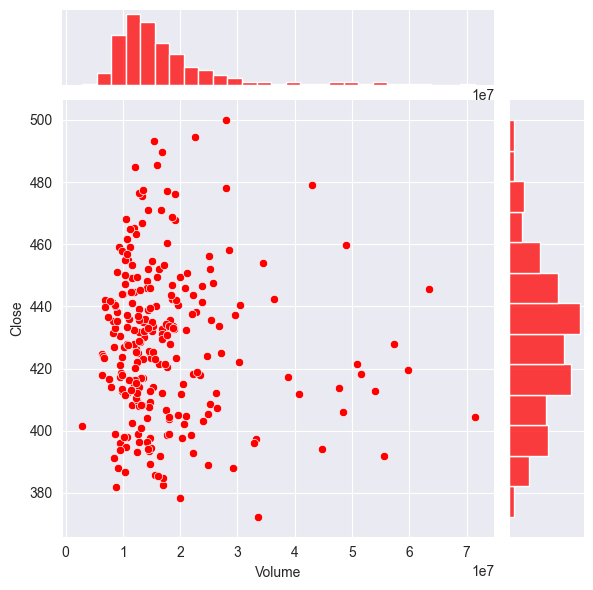

In [49]:
for i in features:
    sns.jointplot(x=i, y='Close', data=df, kind='scatter', color='red')

In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [135]:
# Separate target and feature column in X and y variable
target = 'Close'

# X will be the features
X = df.drop(['Close','Adj Close','Date'],axis=1) 
#y will be the target variable
y = df[target]

y have target variable and X have all other variable.

#### Here in TATA motors stock price prediction, close is the target variable.

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Volume  250 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 7.9 KB


In [137]:
y

0      499.950012
1      493.149994
2      494.450012
3      478.250000
4      477.000000
          ...    
245    441.049988
246    440.549988
247    444.149994
248    441.600006
249    439.899994
Name: Close, Length: 250, dtype: float64

In [138]:
# Check the shape of X and y variable
X.shape, y.shape

((250, 4), (250,))

In [139]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [140]:
# Again check the shape of X and y variable
X.shape, y.shape

((250, 4), (250, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [141]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 4), (50, 4), (200, 1), (50, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different regression algorithms. As we know that our target variable is not discrete format so we have to apply regression algorithm. In our dataset we have the outcome variable or Dependent variable i.e Y having non discrete values. So we will use Regression algorithm.

__Algorithms we are going to use in this step__

1. Linear Regression
2. Lasso Regression
3. Ridge Regression

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [143]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables.

#### Train set cross-validation 

In [144]:
#Using Linear Regression Algorithm to the Training Set
from sklearn.linear_model import LinearRegression

log_R = LinearRegression() #Object Creation

log_R.fit(X_train, y_train)

LinearRegression()

In [145]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.9878398614769165

In [146]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.9865743320943736

In [147]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([2.84844927, 2.61384806, 2.66739369, 3.98012595, 2.80045316,
       3.19061516, 1.72760544, 2.69870321, 2.52003998, 3.02780253])

In [148]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

2.807503644870697

### Prediction 

Now we will perform prediction on the dataset using Linear Regression.

In [149]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

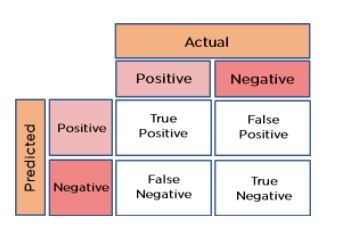

#### This diagram helps in understanding the concept of confusion matrix. 

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [150]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import r2_score  

li = r2_score(y_test, y_predicted)*100
print("The model used is Linear Regression")
print("R2 Score is: -")
print()
print(li)

The model used is Linear Regression
R2 Score is: -

98.65743320943736


# 2. Lasso Regression

Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

In [151]:
#Using Lasso Regression
from sklearn import linear_model
la = linear_model.Lasso(alpha=0.1)

In [152]:
#looking for training data
la.fit(X_train,y_train)

Lasso(alpha=0.1)

In [153]:
#Accuracy check of trainig data
la.score(X_train, y_train)

0.987837260826808

### Prediction

In [154]:
# Predict the values on X_test_scaled dataset 
y_predicted=la.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [155]:
#Accuracy check of test data
lg = r2_score(y_test,y_predicted)*100
print("The model used is Lasso Regression")
print("R2 Score is: -")
print()
print(lg)

The model used is Lasso Regression
R2 Score is: -

98.64209289422429


# 3. Ridge Regression

Ridge regression is used when there are multiple variables that are highly correlated. It helps to prevent overfitting by penalizing the coefficients of the variables. Ridge regression reduces the overfitting by adding a penalty term to the error function that shrinks the size of the coefficients.

In [156]:
#Using Ridge Regression
from sklearn.linear_model import Ridge
ri = Ridge(alpha=1.0)

In [157]:
#looking for training data
ri.fit(X_train,y_train)

Ridge()

In [158]:
#Accuracy check of trainig data
ri.score(X_train, y_train)

0.987839856892322

### Prediction

In [159]:
# Predict the values on X_test_scaled dataset 

y_predicted=ri.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [160]:
#Accuracy check of test data
rid = r2_score(y_test,y_predicted)*100
print("The model used is Ridge Regression")
print("R2 Score is: -")
print()
print(rid)

The model used is Ridge Regression
R2 Score is: -

98.65682990777104


# Insight: -

In [161]:
cal_metric=pd.DataFrame([li,lg,rid],columns=["Score in percentage"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression',
                  'Ridge Regression']
cal_metric

Score in percentage
Linear Regression            98.657433
Lasso Regression             98.642093
Ridge Regression             98.656830


- As you can see with our Linear Regression(0.9865 or 98.65%) we are getting a better result.
- So we gonna save our model with Lasso Regression Algorithm.

### To predict the stock price for the next few days we can use AutoTs Machine Learning Algorithm.

In [163]:
from autots import AutoTS
model = AutoTS(forecast_length=5, frequency='infer', ensemble='simple')
model = model.fit(df, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: B
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 8: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model ETS in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLM in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GLS in generation 0 of 10
Model Number: 15

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents in generation 0 of 10
Model Number: 45 with model ETS in generation 0 of 10
Model Number: 46 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 46: VECM
Model Number: 47 with model ARDL in generation 0 of 10
Model Number: 48 with model MultivariateMotif in generation 0 of 10
Model Number: 49 with model MultivariateMotif in generation 0 of 10
Model Number: 50 with model UnivariateMotif in generation 0 of 10
Model Number: 51 with model UnivariateMotif in generation 0 of 10
Model Number: 52 with model SectionalMotif in generation 0 of 10
Model Number: 53 with model SectionalMotif in generation 0 of 10
Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model Number: 55 with model FBProphet in generation 0 of 10
Template E

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 58 with model NVAR in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 60: UnivariateRegression
Model Number: 61 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 61: ARCH
Model Number: 62 with model ConstantNaive in generation 0 of 10
Model Number: 63 with model LastValueNaive in generation 0 of 10
Model Number: 64 with model AverageValueNaive in generation 0 of 10
Model Number: 65 with model GLS in generation 0 of 10
Model Number: 66 with model SeasonalNaive in generation 0 of 10
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 67: GLM
Model Number: 68 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 112 with model MetricMotif in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 113 with model AverageValueNaive in generation 0 of 10
Model Number: 114 with model ARDL in generation 0 of 10
Model Number: 115 with model ARDL in generation 0 of 10
Model Number: 116 with model SeasonalNaive in generation 0 of 10
Model Number: 117 with model SeasonalNaive in generation 0 of 10
Model Number: 118 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 118: ARDL
Model Number: 119 with model ConstantNaive in generation 0 of 10
Model Number: 120 with model ARIMA in generation 0 of 10
Model Number: 121 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 121: ARCH
Model Number: 122 with model Theta in generation 0 of 10
Model Number: 123 with model UnivariateMotif in generation 0 of 10
Model Number: 124 with model UnivariateMotif in generation 0 of 10
Model Number: 125 with model DatepartRegression in gener

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 126 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 126: GLM
Model Number: 127 with model LastValueNaive in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 128 with model SectionalMotif in generation 0 of 10
Model Number: 129 with model ConstantNaive in generation 0 of 10
Model Number: 130 with model UnivariateMotif in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 132: VAR
Model Number: 133 with model UnivariateMotif in generation 0 of 10
Model Number: 134 with model SeasonalNaive in generation 0 of 10
Model Number: 135 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 135: ARCH
Model Number: 136 with model LastValueNaive in generation 0 of 10
Model Number: 137 with model WindowRegression in generation 0 of 10
Model Number: 138 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 138: GLM
Mo

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 188 with model UnobservedComponents in generation 1 of 10
Model Number: 189 with model ETS in generation 1 of 10
Model Number: 190 with model ETS in generation 1 of 10
Model Number: 191 with model DatepartRegression in generation 1 of 10
Model Number: 192 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 192: NVAR
Model Number: 193 with model Theta in generation 1 of 10
Model Number: 194 with model AverageValueNaive in generation 1 of 10
Model Number: 195 with model MetricMotif in generation 1 of 10
Model Number: 196 with model Theta in generation 1 of 10
Model Number: 197 with model ConstantNaive in generation 1 of 10
Model Number: 198 with model NVAR in generation 1 of 10
Model Number: 199 with model MultivariateMotif in generation 1 of 10
Model Number: 200 with model UnobservedComponents in generation 1 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 200: Unobserve

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 214 with model MetricMotif in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 215 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 215: DatepartRegression
Model Number: 216 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 216: ARIMA
Model Number: 217 with model MetricMotif in generation 1 of 10
Model Number: 218 with model ConstantNaive in generation 1 of 10
Model Number: 219 with model LastValueNaive in generation 1 of 10
Model Number: 220 with model MetricMotif in generation 1 of 10
Model Number: 221 with model Theta in generation 1 of 10
Model Number: 222 with model ARIMA in generation 1 of 10
Model Number: 223 with model ARDL in generation 1 of 10
Model Number: 224 with model Theta in generation 1 of 10
Model Number: 225 with model ARDL in generation 1 of 10
Model Number: 226 with model UnivariateMotif in generation 1 of 1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 292 with model ConstantNaive in generation 1 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 293 with model MultivariateRegression in generation 1 of 10
Model Number: 294 with model ETS in generation 1 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 295 with model ETS in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 295: ETS
Model Number: 296 with model ARDL in generation 1 of 10
Model Number: 297 with model GLS in generation 1 of 10
Model Number: 298 with model MetricMotif in generation 1 of 10
Model Number: 299 with model ARIMA in generation 1 of 10
Model Number: 300 with model DatepartRegression in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 300: DatepartRegression
Model Number: 301 with model Theta in generation 1 of 10
Model Number: 302 with model GLS in generation 1 of 10
Model Number: 303 with model Theta in generation 1 of 10
Model Number: 304 wit

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 310 with model SectionalMotif in generation 1 of 10
Model Number: 311 with model NVAR in generation 1 of 10
New Generation: 2 of 10
Model Number: 312 with model MetricMotif in generation 2 of 10
Model Number: 313 with model UnivariateMotif in generation 2 of 10
Model Number: 314 with model AverageValueNaive in generation 2 of 10
Model Number: 315 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 315: LastValueNaive
Model Number: 316 with model GLS in generation 2 of 10
Model Number: 317 with model ARDL in generation 2 of 10
Model Number: 318 with model NVAR in generation 2 of 10
Model Number: 319 with model NVAR in generation 2 of 10
Model Number: 320 with model Theta in generation 2 of 10
HolidayTransformer: no anomalies detected.
Model Number: 321 with model MetricMotif in generation 2 of 10
Model Number: 322 with model UnivariateMotif in generation 2 of 10
Model Number: 323 with model Sect

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 371 with model ARDL in generation 2 of 10
Model Number: 372 with model MetricMotif in generation 2 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 372: MetricMotif
Model Number: 373 with model AverageValueNaive in generation 2 of 10
Model Number: 374 with model ARIMA in generation 2 of 10
Model Number: 375 with model MultivariateRegression in generation 2 of 10
Model Number: 376 with model SeasonalNaive in generation 2 of 10
Model Number: 377 with model UnivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 377: UnivariateMotif
Model Number: 378 with model MultivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 378: MultivariateRegression
Model Number: 379 with model ARDL in generation 2 of 10
Model Number: 380 with model Theta in generation 2 of 10
Model Number: 381 with model NVAR in gener

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 389 with model ETS in generation 2 of 10
Model Number: 390 with model MetricMotif in generation 2 of 10
Model Number: 391 with model LastValueNaive in generation 2 of 10
Model Number: 392 with model UnobservedComponents in generation 2 of 10
Model Number: 393 with model UnivariateMotif in generation 2 of 10
Model Number: 394 with model WindowRegression in generation 2 of 10
Model Number: 395 with model GLS in generation 2 of 10
Model Number: 396 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 396: LastValueNaive
Model Number: 397 with model SeasonalNaive in generation 2 of 10
Model Number: 398 with model Theta in generation 2 of 10
Model Number: 399 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 400 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 401 with model MetricMotif in generation 2 of 10
Model Number: 402 with model UnobservedComponents in generation 2 of 10
Model Number: 403 with model AverageValueNaive in generation 2 of 10
Model Number: 404 with model SectionalMotif in generation 2 of 10
Model Number: 405 with model UnivariateMotif in generation 2 of 10
Model Number: 406 with model MetricMotif in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 406: MetricMotif
Model Number: 407 with model ETS in generation 2 of 10
Model Number: 408 with model AverageValueNaive in generation 2 of 10
Model Number: 409 with model GLS in generation 2 of 10
Model Number: 410 with model UnivariateMotif in generation 2 of 10
Model Number: 411 with model ARIMA in generation 2 of 10
Model Number: 412 with model SeasonalNaive in generation 2 of 10
Model Number: 413 with model UnobservedComponents in generation 2 of 10
Model Number: 414 with model AverageValueNaive in generation

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 493 with model Theta in generation 3 of 10
Model Number: 494 with model MetricMotif in generation 3 of 10
Model Number: 495 with model WindowRegression in generation 3 of 10
Model Number: 496 with model ARIMA in generation 3 of 10
Model Number: 497 with model MultivariateMotif in generation 3 of 10
Model Number: 498 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 499 with model AverageValueNaive in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 500 with model UnivariateMotif in generation 3 of 10
Model Number: 501 with model MultivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 501: MultivariateMotif
Model Number: 502 with model ARDL in generation 3 of 10
Model Number: 503 with model NVAR in generation 3 of 10
Model Number: 504 with model MultivariateMotif in generation 3 of 10
Model Number: 505 with model ETS in generation 3 of 10
Model Number: 506 with model NVAR in generation 3 of 10
Model Number: 507 with model Theta in generation 3 of 10
Model Number: 508 with model Theta in generation 3 of 10
Model Number: 509 with model LastValueNaive in generation 3 of 10
Model Number: 510 with model SectionalMotif in generation 3 of 10
Model Number: 511 with model UnivariateMotif in generation 3 of 10
Model Number: 512 with model SeasonalNaive in generation 3 of 10
Model Number: 513 with model LastValueNaive in generation 3 of 10
Model Number: 514 with

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 534 with model UnobservedComponents in generation 3 of 10
Model Number: 535 with model MetricMotif in generation 3 of 10
Model Number: 536 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 536: ARIMA
Model Number: 537 with model SectionalMotif in generation 3 of 10
Model Number: 538 with model MetricMotif in generation 3 of 10
Model Number: 539 with model AverageValueNaive in generation 3 of 10
Model Number: 540 with model NVAR in generation 3 of 10
Model Number: 541 with model NVAR in generation 3 of 10
Model Number: 542 with model ConstantNaive in generation 3 of 10
Model Number: 543 with model MultivariateMotif in generation 3 of 10
Model Number: 544 with model MultivariateRegression in generation 3 of 10
Model Number: 545 with model MultivariateMotif in generation 3 of 10
Model Number: 546 with model ARDL in generation 3 of 10
Model Number: 547 with model ETS in generation 3 of 1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 549 with model ARDL in generation 3 of 10
Model Number: 550 with model MultivariateRegression in generation 3 of 10
Model Number: 551 with model AverageValueNaive in generation 3 of 10
Model Number: 552 with model MetricMotif in generation 3 of 10
Model Number: 553 with model ARIMA in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 553: ARIMA
Model Number: 554 with model AverageValueNaive in generation 3 of 10
Model Number: 555 with model ARDL in generation 3 of 10
Model Number: 556 with model MetricMotif in generation 3 of 10
Model Number: 557 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 557: WindowRegression
Model Number: 558 with model ARIMA in generation 3 of 10
Model Number: 559 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'ScipyFilter', '1': 'QuantileTransformer', '2': 'SeasonalDifference', '3': 'SeasonalDifference', '4': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.016666666666666666}}, '1': {'output_distribution': 'normal', 'n_quantiles': 85}, '2': {'lag_1': 28, 'method': 'Mean'}, '3': {'lag_1': 420, 'method': 'Mean'}, '4': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 559: MultivariateRegression
Model Number: 560 with model MultivariateMotif in generation 3 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 561 with model GLS in generation 3 of 10
New Generation: 4 of 10
Model Number: 562 with model LastValueNaive in generation 4 of 10
Model Number: 563 with model UnivariateMotif in generation 4 of 10
Model Number: 564 with model SeasonalNaive in generation 4 of 10
Model Number: 565 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 565: UnivariateMotif
Model Number: 566 with model UnivariateMotif in generation 4 of 10
Model Number: 567 with model Theta in generation 4 of 10
Model Number: 568 with model NVAR in generation 4 of 10
Model Number: 569 with model GLS in generation 4 of 10
Model Number: 570 with model MultivariateRegression in generation 4 of 10
Model Number: 571 with model LastValueNaive in generation 4 of 10
Model Number: 572 with model ARIMA in generation 4 of 10
Model Number: 573 with model NVAR in generation 4 of 10
Model Number: 574 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 598 with model UnobservedComponents in generation 4 of 10
Model Number: 599 with model Theta in generation 4 of 10
Model Number: 600 with model DatepartRegression in generation 4 of 10
Model Number: 601 with model UnivariateMotif in generation 4 of 10
Model Number: 602 with model ARIMA in generation 4 of 10
Model Number: 603 with model ARIMA in generation 4 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 603: ARIMA
Model Number: 604 with model SectionalMotif in generation 4 of 10
Model Number: 605 with model NVAR in generation 4 of 10
Model Number: 606 with model UnivariateMotif in generation 4 of 10
Model Number: 607 with model MetricMotif in generation 4 of 10
Model Number: 608 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 608: DatepartRegression
Model Number: 609 with model UnivariateMotif in generation 4 of 10
Model Number

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 627 with model Theta in generation 4 of 10
Model Number: 628 with model ARDL in generation 4 of 10
Model Number: 629 with model SeasonalNaive in generation 4 of 10
Model Number: 630 with model LastValueNaive in generation 4 of 10
Model Number: 631 with model GLS in generation 4 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 631: GLS
Model Number: 632 with model LastValueNaive in generation 4 of 10
Model Number: 633 with model LastValueNaive in generation 4 of 10
Model Number: 634 with model UnobservedComponents in generation 4 of 10
Model Number: 635 with model NVAR in generation 4 of 10
Model Number: 636 with model MetricMotif in generation 4 of 10
Model Number: 637 with model MetricMotif in generation 4 of 10
Model Number: 638 with model GLS in generation 4 of 10
Model Number: 639 with model UnivariateMotif in generation 4 of 10
Model Number: 640 with model LastValueNaive in generation 4 of 10
Model Number: 641 with model Mul

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 667 with model ARIMA in generation 4 of 10
Model Number: 668 with model MultivariateMotif in generation 4 of 10
Model Number: 669 with model ARDL in generation 4 of 10
Model Number: 670 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 671 with model AverageValueNaive in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 672 with model SeasonalNaive in generation 4 of 10
Model Number: 673 with model NVAR in generation 4 of 10
Model Number: 674 with model MetricMotif in generation 4 of 10
Model Number: 675 with model ARDL in generation 4 of 10
Model Number: 676 with model NVAR in generation 4 of 10
Model Number: 677 with model UnivariateMotif in generation 4 of 10
Model Number: 678 with model ARDL in generation 4 of 10
Model Number: 679 with model SeasonalNaive in generation 4 of 10
Model Number: 680 with model ARIMA in generation 4 of 10
Model Number: 681 with model MetricMotif in generation 4 of 10
Model Number: 682 with model LastValueNaive in generation 4 of 10
Model Number: 683 with model MultivariateMotif in generation 4 of 10
Model Number: 684 with model MultivariateMotif in generation 4 of 10
Model Number: 685 with model ARIMA in generation 4 of 10
Model Number: 686 with model Theta in generation 4 of 10
New Generation: 5 of 10
Model Number: 687 with model MetricMotif in generation

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 756 with model UnivariateMotif in generation 5 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 757 with model MultivariateRegression in generation 5 of 10
Model Number: 758 with model SeasonalNaive in generation 5 of 10
Model Number: 759 with model SeasonalNaive in generation 5 of 10
Model Number: 760 with model LastValueNaive in generation 5 of 10
Model Number: 761 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 762 with model NVAR in generation 5 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 763 with model DatepartRegression in generation 5 of 10
Template Eval Error: AttributeError("module 'tensorflow.compat.v2.__internal__.tracking' has no attribute 'TrackableSaver'") in model 763: DatepartRegression
Model Number: 764 with model SeasonalNaive in generation 5 of 10
Model Number: 765 with model GLS in generation 5 of 10
Model Number: 766 with model GLS in generation 5 of 10
Model Number: 767 with model WindowRegression in generation 5 of 10
Model Number: 768 with model NVAR in generation 5 of 10
Model Number: 769 with model UnivariateMotif in generation 5 of 10
Model Number: 770 with model ARDL in generation 5 of 10
Model Number: 771 with model ARDL in generation 5 of 10
Model Number: 772 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 772: UnivariateMotif
Model Number: 773 with model SeasonalNaive in generation 5 of 10
Model Number: 774 with model MultivariateRegression in generation 5

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 825 with model NVAR in generation 6 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 826 with model AverageValueNaive in generation 6 of 10
Model Number: 827 with model UnivariateMotif in generation 6 of 10
Model Number: 828 with model MetricMotif in generation 6 of 10
Model Number: 829 with model NVAR in generation 6 of 10
Model Number: 830 with model GLM in generation 6 of 10
Model Number: 831 with model WindowRegression in generation 6 of 10
Template Eval Error: KeyError('model') in model 831: WindowRegression
Model Number: 832 with model MetricMotif in generation 6 of 10
Model Number: 833 with model MetricMotif in generation 6 of 10
Model Number: 834 with model ARIMA in generation 6 of 10
Model Number: 835 with model SeasonalNaive in generation 6 of 10
Model Number: 836 with model MultivariateMotif in generation 6 of 10
Model Number: 837 with model UnivariateMotif in generation 6 of 10
Model Number: 838 with model Theta in generation 6 of 10
Model Number: 839 with model Theta in generation 6 of 10
Model Number: 840 with model LastValueNaive in generat

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 846 with model NVAR in generation 6 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 847 with model MultivariateMotif in generation 6 of 10
Model Number: 848 with model UnivariateMotif in generation 6 of 10
Model Number: 849 with model UnivariateMotif in generation 6 of 10
Model Number: 850 with model MetricMotif in generation 6 of 10
Model Number: 851 with model ETS in generation 6 of 10
Model Number: 852 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 853 with model MetricMotif in generation 6 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 854 with model UnivariateMotif in generation 6 of 10
Model Number: 855 with model LastValueNaive in generation 6 of 10
Model Number: 856 with model ARDL in generation 6 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 856: ARDL
Model Number: 857 with model ARDL in generation 6 of 10
Model Number: 858 with model SectionalMotif in generation 6 of 10
Model Number: 859 with model NVAR in generation 6 of 10
Model Number: 860 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 860: DatepartRegression
Model Number: 861 with model NVAR in generation 6 of 10
Model Number: 862 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 862: ARDL
Model Number: 863 with model MultivariateMotif in generation 6 of 10
Model Number: 864 with model NVAR in generation 6 of 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 894 with model MetricMotif in generation 7 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 895 with model ConstantNaive in generation 7 of 10
Model Number: 896 with model SeasonalNaive in generation 7 of 10
Model Number: 897 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 898 with model NVAR in generation 7 of 10
Model Number: 899 with model GLS in generation 7 of 10
Model Number: 900 with model ETS in generation 7 of 10
Model Number: 901 with model ARIMA in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 901: ARIMA
Model Number: 902 with model UnobservedComponents in generation 7 of 10
Model Number: 903 with model SeasonalNaive in generation 7 of 10
Model Number: 904 with model UnivariateMotif in generation 7 of 10
Model Number: 905 with model UnivariateMotif in generation 7 of 10
Model Number: 906 with model SeasonalNaive in generation 7 of 10
Model Number: 907 with model SeasonalNaive in generation 7 of 10
Model Number: 908 with model AverageValueNaive in generation 7 of 10
Model Number: 909 with model Theta in generation 7 of 10
Model Number: 910 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 910: ARD

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 912 with model NVAR in generation 7 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 913 with model MultivariateMotif in generation 7 of 10
Model Number: 914 with model GLS in generation 7 of 10
Model Number: 915 with model NVAR in generation 7 of 10
Model Number: 916 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 916: UnivariateMotif
Model Number: 917 with model SectionalMotif in generation 7 of 10
Model Number: 918 with model NVAR in generation 7 of 10
Model Number: 919 with model ARDL in generation 7 of 10
Model Number: 920 with model LastValueNaive in generation 7 of 10
Model Number: 921 with model ARDL in generation 7 of 10
Model Number: 922 with model LastValueNaive in generation 7 of 10
Model Number: 923 with model MultivariateMotif in generation 7 of 10
Model Number: 924 with model ConstantNaive in generation 7 of 10
Model Number: 925 with model AverageValueNaive in generation 7 of 10
Model Number: 926 with model ARDL 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


Model Number: 961 with model MetricMotif in generation 7 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 962 with model ARDL in generation 7 of 10
Model Number: 963 with model LastValueNaive in generation 7 of 10
Model Number: 964 with model ARIMA in generation 7 of 10
Model Number: 965 with model MetricMotif in generation 7 of 10
Model Number: 966 with model UnivariateMotif in generation 7 of 10
Model Number: 967 with model UnivariateMotif in generation 7 of 10
Model Number: 968 with model NVAR in generation 7 of 10
Model Number: 969 with model ETS in generation 7 of 10
Model Number: 970 with model LastValueNaive in generation 7 of 10
Model Number: 971 with model GLS in generation 7 of 10
Model Number: 972 with model UnivariateMotif in generation 7 of 10
Model Number: 973 with model Theta in generation 7 of 10
Model Number: 974 with model LastValueNaive in generation 7 of 10
Model Number: 975 with model MultivariateRegression in generation 7 of 10
Model Number: 976 with model UnobservedComponents in generation 7 of 10
Model Number: 977 with model LastValueNaive in generatio

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 990 with model UnivariateMotif in generation 8 of 10
Model Number: 991 with model ARDL in generation 8 of 10
Model Number: 992 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 992: GLM
Model Number: 993 with model ARDL in generation 8 of 10
Model Number: 994 with model GLS in generation 8 of 10
Model Number: 995 with model GLS in generation 8 of 10
Model Number: 996 with model LastValueNaive in generation 8 of 10
Model Number: 997 with model ARDL in generation 8 of 10
Model Number: 998 with model SectionalMotif in generation 8 of 10
Model Number: 999 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 999: LastValueNaive
Model Number: 1000 with model ARIMA in generation 8 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1000: ARIMA
Model Number: 1001 with model

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 1032 with model AverageValueNaive in generation 8 of 10
Model Number: 1033 with model SeasonalNaive in generation 8 of 10
Model Number: 1034 with model AverageValueNaive in generation 8 of 10
Model Number: 1035 with model ARDL in generation 8 of 10
Model Number: 1036 with model ETS in generation 8 of 10
Model Number: 1037 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1037: UnobservedComponents
Model Number: 1038 with model Theta in generation 8 of 10
Model Number: 1039 with model Theta in generation 8 of 10
Model Number: 1040 with model SeasonalNaive in generation 8 of 10
Model Number: 1041 with model ConstantNaive in generation 8 of 10
Model Number: 1042 with model MultivariateMotif in generation 8 of 10
Model Number: 1043 with model NVAR in generation 8 of 10
Model Number: 1044 with model MultivariateMotif in generation 8 of 10
Model Number: 1045 with model ARIMA 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1094 with model ARDL in generation 9 of 10
Model Number: 1095 with model ARDL in generation 9 of 10
Model Number: 1096 with model ARDL in generation 9 of 10
Model Number: 1097 with model ARDL in generation 9 of 10
Model Number: 1098 with model LastValueNaive in generation 9 of 10
Model Number: 1099 with model SeasonalNaive in generation 9 of 10
Model Number: 1100 with model GLS in generation 9 of 10
Model Number: 1101 with model MetricMotif in generation 9 of 10
Model Number: 1102 with model LastValueNaive in generation 9 of 10
Model Number: 1103 with model ARIMA in generation 9 of 10
Model Number: 1104 with model NVAR in generation 9 of 10
Model Number: 1105 with model SeasonalNaive in generation 9 of 10
Model Number: 1106 with model UnivariateMotif in generation 9 of 10
Model Number: 1107 with model LastValueNaive in generation 9 of 10
Model Number: 1108 with model SeasonalNaive in generation 9 of 10
Model Number: 1109 with model ARDL in generation 9 of 10
Model Number:

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 1128 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1128: NVAR
Model Number: 1129 with model SectionalMotif in generation 9 of 10


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1130 with model MetricMotif in generation 9 of 10
Model Number: 1131 with model ARDL in generation 9 of 10
Model Number: 1132 with model NVAR in generation 9 of 10
Model Number: 1133 with model SectionalMotif in generation 9 of 10
Model Number: 1134 with model MetricMotif in generation 9 of 10
Model Number: 1135 with model MultivariateRegression in generation 9 of 10
Model Number: 1136 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1136: AverageValueNaive
Model Number: 1137 with model ARIMA in generation 9 of 10
Model Number: 1138 with model ETS in generation 9 of 10
Model Number: 1139 with model ARIMA in generation 9 of 10
Model Number: 1140 with model UnobservedComponents in generation 9 of 10
Model Number: 1141 with model LastValueNaive in generation 9 of 10
Model Number: 1142 with model AverageValueNaive in generation 9 of 10
Model Number: 1143 with model MetricMotif in generation 9 of 10

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 1172 with model UnivariateMotif in generation 9 of 10


[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1173 with model GLS in generation 9 of 10
Model Number: 1174 with model UnobservedComponents in generation 9 of 10
Model Number: 1175 with model MetricMotif in generation 9 of 10
Model Number: 1176 with model NVAR in generation 9 of 10
Model Number: 1177 with model UnivariateMotif in generation 9 of 10
Model Number: 1178 with model SeasonalNaive in generation 9 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1178: SeasonalNaive
Model Number: 1179 with model Theta in generation 9 of 10
Model Number: 1180 with model GLS in generation 9 of 10
Model Number: 1181 with model Theta in generation 9 of 10
Model Number: 1182 with model SectionalMotif in generation 9 of 10
Model Number: 1183 with model NVAR in generation 9 of 10
Model Number: 1184 with model Theta in generation 9 of 10
Model Number: 1185 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 1256 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1256: NVAR
Model Number: 1257 with model MetricMotif in generation 10 of 10
Model Number: 1258 with model LastValueNaive in generation 10 of 10
Model Number: 1259 with model MetricMotif in generation 10 of 10
Model Number: 1260 with model Theta in generation 10 of 10
Model Number: 1261 with model SectionalMotif in generation 10 of 10
Model Number: 1262 with model Ensemble in generation 11 of Ensembles
Model Number: 1263 with model Ensemble in generation 11 of Ensembles
Model Number: 1264 with model Ensemble in generation 11 of Ensembles
Model Number: 1265 with model Ensemble in generation 11 of Ensembles
Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Model Number: 1267 with model Ensemble in generation 11 of Ensembles
Model Number: 1268 with model Ensemble in generation 11 of Ensembles
Model Number: 1269 with model Ensemble in generat

72 - Theta with avg smape 1.88: 
Model Number: 73 of 176 with model ARIMA for Validation 1
73 - ARIMA with avg smape 0.76: 
Model Number: 74 of 176 with model MetricMotif for Validation 1
74 - MetricMotif with avg smape 1.16: 
Model Number: 75 of 176 with model MultivariateMotif for Validation 1
üìà 75 - MultivariateMotif with avg smape 0.71: 
Model Number: 76 of 176 with model ARIMA for Validation 1
76 - ARIMA with avg smape 0.84: 
Model Number: 77 of 176 with model MetricMotif for Validation 1
77 - MetricMotif with avg smape 2.44: 
Model Number: 78 of 176 with model MetricMotif for Validation 1
78 - MetricMotif with avg smape 3.52: 
Model Number: 79 of 176 with model GLS for Validation 1
79 - GLS with avg smape 1.3: 
Model Number: 80 of 176 with model UnobservedComponents for Validation 1
80 - UnobservedComponents with avg smape 0.82: 
Model Number: 81 of 176 with model ARIMA for Validation 1
81 - ARIMA with avg smape 0.77: 
Model Number: 82 of 176 with model MultivariateMotif for V

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

95 - MultivariateRegression with avg smape 2.28: 
Model Number: 96 of 176 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

96 - MultivariateRegression with avg smape 0.7: 
Model Number: 97 of 176 with model MultivariateRegression for Validation 1
97 - MultivariateRegression with avg smape 0.82: 
Model Number: 98 of 176 with model UnivariateMotif for Validation 1
98 - UnivariateMotif with avg smape 2.33: 
Model Number: 99 of 176 with model UnivariateMotif for Validation 1
99 - UnivariateMotif with avg smape 3.32: 
Model Number: 100 of 176 with model ARIMA for Validation 1
100 - ARIMA with avg smape 0.76: 
Model Number: 101 of 176 with model ARIMA for Validation 1
101 - ARIMA with avg smape 0.75: 
Model Number: 102 of 176 with model GLS for Validation 1
102 - GLS with avg smape 1.24: 
Model Number: 103 of 176 with model GLS for Validation 1
103 - GLS with avg smape 1.24: 
Model Number: 104 of 176 with model GLS for Validation 1
104 - GLS with avg smape 1.59: 
Model Number: 105 of 176 with model AverageValueNaive for Validation 1
105 - AverageValueNaive with avg smape 0.88: 
Model Number: 106 of 176 with mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


118 - DatepartRegression with avg smape 0.83: 
Model Number: 119 of 176 with model UnivariateMotif for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


119 - UnivariateMotif with avg smape 2.41: 
Model Number: 120 of 176 with model WindowRegression for Validation 1
120 - WindowRegression with avg smape 3.43: 
Model Number: 121 of 176 with model SectionalMotif for Validation 1
121 - SectionalMotif with avg smape 1.9: 
Model Number: 122 of 176 with model UnobservedComponents for Validation 1
122 - UnobservedComponents with avg smape 2.41: 
Model Number: 123 of 176 with model UnobservedComponents for Validation 1
123 - UnobservedComponents with avg smape 2.41: 
Model Number: 124 of 176 with model ETS for Validation 1
124 - ETS with avg smape 0.9: 
Model Number: 125 of 176 with model GLS for Validation 1
125 - GLS with avg smape 1.89: 
Model Number: 126 of 176 with model SectionalMotif for Validation 1
126 - SectionalMotif with avg smape 1.56: 
Model Number: 127 of 176 with model GLS for Validation 1
127 - GLS with avg smape 1.86: 
Model Number: 128 of 176 with model SectionalMotif for Validation 1
128 - SectionalMotif with avg smape 0.85

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


143 - DatepartRegression with avg smape 2.79: 
Model Number: 144 of 176 with model SectionalMotif for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - SectionalMotif with avg smape 1.89: 
Model Number: 145 of 176 with model UnobservedComponents for Validation 1
145 - UnobservedComponents with avg smape 0.98: 
Model Number: 146 of 176 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


146 - DatepartRegression with avg smape 2.76: 
Model Number: 147 of 176 with model SectionalMotif for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


147 - SectionalMotif with avg smape 1.17: 
Model Number: 148 of 176 with model UnobservedComponents for Validation 1
148 - UnobservedComponents with avg smape 3.89: 
Model Number: 149 of 176 with model SectionalMotif for Validation 1
149 - SectionalMotif with avg smape 3.29: 
Model Number: 150 of 176 with model DatepartRegression for Validation 1
150 - DatepartRegression with avg smape 0.77: 
Model Number: 151 of 176 with model UnobservedComponents for Validation 1
151 - UnobservedComponents with avg smape 2.05: 
Model Number: 152 of 176 with model UnobservedComponents for Validation 1
152 - UnobservedComponents with avg smape 0.79: 
Model Number: 153 of 176 with model UnobservedComponents for Validation 1
153 - UnobservedComponents with avg smape 1.46: 
Model Number: 154 of 176 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.


154 - DatepartRegression with avg smape 1.23: 
Model Number: 155 of 176 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


155 - DatepartRegression with avg smape 1.08: 
Model Number: 156 of 176 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.


156 - DatepartRegression with avg smape 2.77: 
Model Number: 157 of 176 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


157 - DatepartRegression with avg smape 3.11: 
Model Number: 158 of 176 with model WindowRegression for Validation 1
158 - WindowRegression with avg smape 1.28: 
Model Number: 159 of 176 with model WindowRegression for Validation 1
159 - WindowRegression with avg smape 1.56: 
Model Number: 160 of 176 with model SectionalMotif for Validation 1
160 - SectionalMotif with avg smape 2.72: 
Model Number: 161 of 176 with model WindowRegression for Validation 1
161 - WindowRegression with avg smape 1.63: 
Model Number: 162 of 176 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


162 - DatepartRegression with avg smape 2.69: 
Model Number: 163 of 176 with model WindowRegression for Validation 1
163 - WindowRegression with avg smape 1.6: 
Model Number: 164 of 176 with model GLM for Validation 1
164 - GLM with avg smape 1.29: 
Model Number: 165 of 176 with model ConstantNaive for Validation 1
165 - ConstantNaive with avg smape 1.27: 
Model Number: 166 of 176 with model GLM for Validation 1
166 - GLM with avg smape 1.51: 
Model Number: 167 of 176 with model ConstantNaive for Validation 1
167 - ConstantNaive with avg smape 1.62: 
Model Number: 168 of 176 with model ConstantNaive for Validation 1
168 - ConstantNaive with avg smape 1.6: 
Model Number: 169 of 176 with model ConstantNaive for Validation 1
169 - ConstantNaive with avg smape 2.23: 
Model Number: 170 of 176 with model GLM for Validation 1
170 - GLM with avg smape 2.82: 
Model Number: 171 of 176 with model ConstantNaive for Validation 1
171 - ConstantNaive with avg smape 2.17: 
Model Number: 172 of 176 wit

67 - ARDL with avg smape 2.33: 
Model Number: 68 of 176 with model MetricMotif for Validation 2
68 - MetricMotif with avg smape 9.11: 
Model Number: 69 of 176 with model AverageValueNaive for Validation 2
69 - AverageValueNaive with avg smape 3.82: 
Model Number: 70 of 176 with model ARIMA for Validation 2
70 - ARIMA with avg smape 6.39: 
Model Number: 71 of 176 with model GLM for Validation 2
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 71: GLM
Model Number: 72 of 176 with model Theta for Validation 2
72 - Theta with avg smape 6.71: 
Model Number: 73 of 176 with model ARIMA for Validation 2
73 - ARIMA with avg smape 8.14: 
Model Number: 74 of 176 with model MetricMotif for Validation 2
74 - MetricMotif with avg smape 1.11: 
Model Number: 75 of 176 with model MultivariateMotif for Validation 2
75 - MultivariateMotif with avg smape 4.56: 
Model Number: 76 of 176 with model ARIMA for Validation 2
76 - ARIMA with avg sma

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

95 - MultivariateRegression with avg smape 2.96: 
Model Number: 96 of 176 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

96 - MultivariateRegression with avg smape 3.24: 
Model Number: 97 of 176 with model MultivariateRegression for Validation 2
97 - MultivariateRegression with avg smape 6.96: 
Model Number: 98 of 176 with model UnivariateMotif for Validation 2
98 - UnivariateMotif with avg smape 5.4: 
Model Number: 99 of 176 with model UnivariateMotif for Validation 2
99 - UnivariateMotif with avg smape 7.34: 
Model Number: 100 of 176 with model ARIMA for Validation 2
100 - ARIMA with avg smape 7.26: 
Model Number: 101 of 176 with model ARIMA for Validation 2
101 - ARIMA with avg smape 7.52: 
Model Number: 102 of 176 with model GLS for Validation 2
102 - GLS with avg smape 3.43: 
Model Number: 103 of 176 with model GLS for Validation 2
103 - GLS with avg smape 5.11: 
Model Number: 104 of 176 with model GLS for Validation 2
104 - GLS with avg smape 4.74: 
Model Number: 105 of 176 with model AverageValueNaive for Validation 2
105 - AverageValueNaive with avg smape 4.45: 
Model Number: 106 of 176 with mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


118 - DatepartRegression with avg smape 7.83: 
Model Number: 119 of 176 with model UnivariateMotif for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


119 - UnivariateMotif with avg smape 6.48: 
Model Number: 120 of 176 with model WindowRegression for Validation 2
120 - WindowRegression with avg smape 5.0: 
Model Number: 121 of 176 with model SectionalMotif for Validation 2
121 - SectionalMotif with avg smape 1.69: 
Model Number: 122 of 176 with model UnobservedComponents for Validation 2
122 - UnobservedComponents with avg smape 4.69: 
Model Number: 123 of 176 with model UnobservedComponents for Validation 2
123 - UnobservedComponents with avg smape 4.69: 
Model Number: 124 of 176 with model ETS for Validation 2
124 - ETS with avg smape 6.45: 
Model Number: 125 of 176 with model GLS for Validation 2
125 - GLS with avg smape 5.42: 
Model Number: 126 of 176 with model SectionalMotif for Validation 2
126 - SectionalMotif with avg smape 3.79: 
Model Number: 127 of 176 with model GLS for Validation 2
127 - GLS with avg smape 3.83: 
Model Number: 128 of 176 with model SectionalMotif for Validation 2
128 - SectionalMotif with avg smape 6.0

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


143 - DatepartRegression with avg smape 4.78: 
Model Number: 144 of 176 with model SectionalMotif for Validation 2
144 - SectionalMotif with avg smape 6.03: 
Model Number: 145 of 176 with model UnobservedComponents for Validation 2
145 - UnobservedComponents with avg smape 6.98: 
Model Number: 146 of 176 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


146 - DatepartRegression with avg smape 8.73: 
Model Number: 147 of 176 with model SectionalMotif for Validation 2
147 - SectionalMotif with avg smape 7.8: 
Model Number: 148 of 176 with model UnobservedComponents for Validation 2
148 - UnobservedComponents with avg smape 8.94: 
Model Number: 149 of 176 with model SectionalMotif for Validation 2
149 - SectionalMotif with avg smape 6.79: 
Model Number: 150 of 176 with model DatepartRegression for Validation 2
150 - DatepartRegression with avg smape 10.86: 
Model Number: 151 of 176 with model UnobservedComponents for Validation 2
151 - UnobservedComponents with avg smape 8.38: 
Model Number: 152 of 176 with model UnobservedComponents for Validation 2
152 - UnobservedComponents with avg smape 6.66: 
Model Number: 153 of 176 with model UnobservedComponents for Validation 2
153 - UnobservedComponents with avg smape 7.31: 
Model Number: 154 of 176 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


154 - DatepartRegression with avg smape 7.02: 
Model Number: 155 of 176 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.


155 - DatepartRegression with avg smape 5.28: 
Model Number: 156 of 176 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


156 - DatepartRegression with avg smape 2.69: 
Model Number: 157 of 176 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


157 - DatepartRegression with avg smape 2.28: 
Model Number: 158 of 176 with model WindowRegression for Validation 2
158 - WindowRegression with avg smape 3.02: 
Model Number: 159 of 176 with model WindowRegression for Validation 2
159 - WindowRegression with avg smape 1.26: 
Model Number: 160 of 176 with model SectionalMotif for Validation 2
160 - SectionalMotif with avg smape 3.13: 
Model Number: 161 of 176 with model WindowRegression for Validation 2
161 - WindowRegression with avg smape 0.74: 
Model Number: 162 of 176 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.3s finished


162 - DatepartRegression with avg smape 3.17: 
Model Number: 163 of 176 with model WindowRegression for Validation 2
163 - WindowRegression with avg smape 6.57: 
Model Number: 164 of 176 with model GLM for Validation 2
164 - GLM with avg smape 0.49: 
Model Number: 165 of 176 with model ConstantNaive for Validation 2
165 - ConstantNaive with avg smape 0.47: 
Model Number: 166 of 176 with model GLM for Validation 2
166 - GLM with avg smape 11.2: 
Model Number: 167 of 176 with model ConstantNaive for Validation 2
167 - ConstantNaive with avg smape 3.04: 
Model Number: 168 of 176 with model ConstantNaive for Validation 2
168 - ConstantNaive with avg smape 7.2: 
Model Number: 169 of 176 with model ConstantNaive for Validation 2
169 - ConstantNaive with avg smape 3.81: 
Model Number: 170 of 176 with model GLM for Validation 2
170 - GLM with avg smape 4.38: 
Model Number: 171 of 176 with model ConstantNaive for Validation 2
171 - ConstantNaive with avg smape 3.48: 
Model Number: 172 of 176 wi

67 - ARDL with avg smape 7.44: 
Model Number: 68 of 176 with model MetricMotif for Validation 3
68 - MetricMotif with avg smape 5.42: 
Model Number: 69 of 176 with model AverageValueNaive for Validation 3
69 - AverageValueNaive with avg smape 2.18: 
Model Number: 70 of 176 with model ARIMA for Validation 3
70 - ARIMA with avg smape 4.06: 
Model Number: 71 of 176 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 71: GLM
Model Number: 72 of 176 with model Theta for Validation 3
72 - Theta with avg smape 4.16: 
Model Number: 73 of 176 with model ARIMA for Validation 3
73 - ARIMA with avg smape 3.68: 
Model Number: 74 of 176 with model MetricMotif for Validation 3
74 - MetricMotif with avg smape 5.88: 
Model Number: 75 of 176 with model MultivariateMotif for Validation 3
75 - MultivariateMotif with avg smape 3.41: 
Model Number: 76 of 176 with model ARIMA for Validation 3
76 - ARIMA with avg sma

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

95 - MultivariateRegression with avg smape 2.98: 
Model Number: 96 of 176 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

96 - MultivariateRegression with avg smape 3.37: 
Model Number: 97 of 176 with model MultivariateRegression for Validation 3
97 - MultivariateRegression with avg smape 4.46: 
Model Number: 98 of 176 with model UnivariateMotif for Validation 3
98 - UnivariateMotif with avg smape 2.29: 
Model Number: 99 of 176 with model UnivariateMotif for Validation 3
99 - UnivariateMotif with avg smape 3.08: 
Model Number: 100 of 176 with model ARIMA for Validation 3
100 - ARIMA with avg smape 3.79: 
Model Number: 101 of 176 with model ARIMA for Validation 3
101 - ARIMA with avg smape 3.58: 
Model Number: 102 of 176 with model GLS for Validation 3
102 - GLS with avg smape 4.96: 
Model Number: 103 of 176 with model GLS for Validation 3
103 - GLS with avg smape 4.99: 
Model Number: 104 of 176 with model GLS for Validation 3
104 - GLS with avg smape 4.94: 
Model Number: 105 of 176 with model AverageValueNaive for Validation 3
105 - AverageValueNaive with avg smape 5.43: 
Model Number: 106 of 176 with mod

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


118 - DatepartRegression with avg smape 5.5: 
Model Number: 119 of 176 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


119 - UnivariateMotif with avg smape 3.82: 
Model Number: 120 of 176 with model WindowRegression for Validation 3
120 - WindowRegression with avg smape 4.77: 
Model Number: 121 of 176 with model SectionalMotif for Validation 3
121 - SectionalMotif with avg smape 4.96: 
Model Number: 122 of 176 with model UnobservedComponents for Validation 3
122 - UnobservedComponents with avg smape 4.17: 
Model Number: 123 of 176 with model UnobservedComponents for Validation 3
123 - UnobservedComponents with avg smape 4.17: 
Model Number: 124 of 176 with model ETS for Validation 3
124 - ETS with avg smape 3.97: 
Model Number: 125 of 176 with model GLS for Validation 3
125 - GLS with avg smape 4.56: 
Model Number: 126 of 176 with model SectionalMotif for Validation 3
126 - SectionalMotif with avg smape 1.99: 
Model Number: 127 of 176 with model GLS for Validation 3
127 - GLS with avg smape 4.56: 
Model Number: 128 of 176 with model SectionalMotif for Validation 3
128 - SectionalMotif with avg smape 3.

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


143 - DatepartRegression with avg smape 3.32: 
Model Number: 144 of 176 with model SectionalMotif for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - SectionalMotif with avg smape 2.55: 
Model Number: 145 of 176 with model UnobservedComponents for Validation 3
145 - UnobservedComponents with avg smape 4.28: 
Model Number: 146 of 176 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s


146 - DatepartRegression with avg smape 5.23: 
Model Number: 147 of 176 with model SectionalMotif for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


147 - SectionalMotif with avg smape 4.67: 
Model Number: 148 of 176 with model UnobservedComponents for Validation 3
148 - UnobservedComponents with avg smape 3.99: 
Model Number: 149 of 176 with model SectionalMotif for Validation 3
149 - SectionalMotif with avg smape 3.58: 
Model Number: 150 of 176 with model DatepartRegression for Validation 3
150 - DatepartRegression with avg smape 5.13: 
Model Number: 151 of 176 with model UnobservedComponents for Validation 3
151 - UnobservedComponents with avg smape 3.41: 
Model Number: 152 of 176 with model UnobservedComponents for Validation 3
152 - UnobservedComponents with avg smape 4.15: 
Model Number: 153 of 176 with model UnobservedComponents for Validation 3
153 - UnobservedComponents with avg smape 4.8: 
Model Number: 154 of 176 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.


154 - DatepartRegression with avg smape 4.49: 
Model Number: 155 of 176 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


155 - DatepartRegression with avg smape 4.67: 
Model Number: 156 of 176 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


156 - DatepartRegression with avg smape 3.43: 
Model Number: 157 of 176 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


157 - DatepartRegression with avg smape 3.06: 
Model Number: 158 of 176 with model WindowRegression for Validation 3
158 - WindowRegression with avg smape 4.24: 
Model Number: 159 of 176 with model WindowRegression for Validation 3
159 - WindowRegression with avg smape 3.42: 
Model Number: 160 of 176 with model SectionalMotif for Validation 3
160 - SectionalMotif with avg smape 3.13: 
Model Number: 161 of 176 with model WindowRegression for Validation 3
161 - WindowRegression with avg smape 4.58: 
Model Number: 162 of 176 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


162 - DatepartRegression with avg smape 3.13: 
Model Number: 163 of 176 with model WindowRegression for Validation 3
163 - WindowRegression with avg smape 4.5: 
Model Number: 164 of 176 with model GLM for Validation 3
164 - GLM with avg smape 4.89: 
Model Number: 165 of 176 with model ConstantNaive for Validation 3
165 - ConstantNaive with avg smape 4.92: 
Model Number: 166 of 176 with model GLM for Validation 3
166 - GLM with avg smape 4.36: 
Model Number: 167 of 176 with model ConstantNaive for Validation 3
167 - ConstantNaive with avg smape 2.37: 
Model Number: 168 of 176 with model ConstantNaive for Validation 3
168 - ConstantNaive with avg smape 5.97: 
Model Number: 169 of 176 with model ConstantNaive for Validation 3
169 - ConstantNaive with avg smape 3.26: 
Model Number: 170 of 176 with model GLM for Validation 3
170 - GLM with avg smape 2.99: 
Model Number: 171 of 176 with model ConstantNaive for Validation 3
171 - ConstantNaive with avg smape 2.07: 
Model Number: 172 of 176 wi

In [164]:
forecast

Close
2023-02-20  438.245321
2023-02-21  436.408424
2023-02-22  435.946522
2023-02-23  435.098519
2023-02-24  434.784084

### If you want to predict the stock price for the next 5 or 10 days you can use AutoTs Machine Learning Algorithm as shown above.

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [165]:
import pickle
pickle.dump(log_R , open('TATA_Motors_Stock_Prediction_li.pkl', 'wb'))
pickle.dump(la , open('TATA_Motors_Stock_Prediction_la.pkl', 'wb'))
pickle.dump(ri , open('TATA_Motors_Stock_Prediction_ri.pkl', 'wb'))

In [176]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('TATA_Motors_Stock_Prediction_li.pkl', 'rb'))
    Close = str(pickled_model.predict(features)[0][0])
    
    return str(f'The TATA motors stock Price is closed at {Close}')

#### We can test our model by giving our own parameters or features to predict. 

In [178]:
Open=498.000000
High=502.649994
Low=491.500000
Volume=15476803

In [179]:
model_prediction([[Open,High,Low,Volume]])

'The Stock Price is 495.5883288666215'

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps predicting the TATA Motors stock price. It helps the investor in identifying the stock to be invest. The accuracy for the prediction is 98.65%  and it signifies the accurate prediction of the stock.  